# M7_AG1_MODELO DE SENTIMIENTO


## Carga del dataset

In [1]:
import pandas as pd
import numpy as np

reviews = pd.read_csv("https://raw.githubusercontent.com/albertojulian/master-ub/main/reviews.txt", header = None)
reviews.columns = ['review']
reviews

,review
0,bromwell high is a cartoon comedy . it ran at ...
1,story of a man who has unnatural feelings for ...
2,homelessness or houselessness as george carli...
3,airport starts as a brand new luxury pla...
4,brilliant over acting by lesley ann warren . ...
...,...
24995,i saw descent last night at the stockholm fi...
24996,a christmas together actually came before my t...
24997,some films that you pick up for a pound turn o...
24998,working class romantic drama from director ma...


Se tienen 25000 reviews

In [2]:
labels = pd.read_csv("https://raw.githubusercontent.com/albertojulian/master-ub/main/labels.txt", header = None)
labels.columns = ['label']
labels

,label
0,positive
1,negative
2,positive
3,negative
4,positive
...,...
24995,negative
24996,positive
24997,negative
24998,positive


Asociados a 25000 etiquetas. Veamos si se trata de una muestra balanceada

In [3]:
labels.groupby(['label'])[['label']].count()

,label
label,
negative,12500
positive,12500


Vemos que tenemos una muestra balanceada con 12500 registros para cada sentimiento

In [4]:
print(reviews.isnull().sum())
print(labels.isnull().sum())

review    0
dtype: int64
label    0
dtype: int64


Vemos que no se cuenta con valores faltantes

## Preprocesado

### Eliminar signos no alfanuméricos

In [5]:
import re
reviews['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
reviews.head(5)

,review
0,bromwell high is a cartoon comedy . it ran at ...
1,story of a man who has unnatural feelings for ...
2,homelessness or houselessness as george carli...
3,airport starts as a brand new luxury pla...
4,brilliant over acting by lesley ann warren . ...


###  Tokenizar cada revisión

Primero vamos a eliminar las stopwords

In [6]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "br" , "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "s", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "t" , "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves", ",", "."]

reviews['review'] = reviews['review'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))
reviews


,review
0,bromwell high cartoon comedy ran time programs...
1,story man unnatural feelings pig starts openin...
2,homelessness houselessness george carlin state...
3,airport starts brand new luxury plane loaded v...
4,brilliant acting lesley ann warren best dramat...
...,...
24995,saw descent last night stockholm film festival...
24996,christmas together actually came time ve raise...
24997,films pick pound turn rather good rd century f...
24998,working class romantic drama director martin r...


Ahora las tokenizamos

In [7]:

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
text=reviews['review']
tokenizer.fit_on_texts(text)
word_index=tokenizer.word_index
print(len(word_index))

73949


Vemos que se tiene un total de 73949 palabras distintas, ahora seleccionaremos las n más frecuentes. Para ello debemos extraer todos los reviews y juntarlos. Luego se separan las palabras y se cuentan y se seleccionan las n más comunes:

In [8]:
from collections import Counter

reviews_values = reviews['review'].values
words = ' '.join(reviews_values)
words = words.split()

counter_of_flat_list = Counter(words)
vocab = sorted(counter_of_flat_list, key=counter_of_flat_list.get, reverse=True)
int2word = dict(enumerate(vocab, 1))
int2word[0] = '<PAD>'
word2int = {word: id for id, word in int2word.items()}

n = 20
counter_of_flat_list.most_common(n) 

[('movie', 44039),
 ('film', 40155),
 ('not', 30626),
 ('one', 26789),
 ('like', 20276),
 ('just', 17771),
 ('good', 15143),
 ('can', 14654),
 ('time', 12724),
 ('no', 12717),
 ('even', 12651),
 ('story', 11988),
 ('really', 11738),
 ('see', 11478),
 ('well', 10659),
 ('much', 9763),
 ('get', 9309),
 ('bad', 9308),
 ('people', 9285),
 ('will', 9211)]

Vemos que la palabra más común es movie con 44039 registros

Ahora visualizaremos que ya se creo un diccionario que asocia cada una de las palabras a un número identificador:

In [9]:
word_index

{'movie': 1,
 'film': 2,
 'not': 3,
 'one': 4,
 'like': 5,
 'just': 6,
 'good': 7,
 'can': 8,
 'time': 9,
 'no': 10,
 'even': 11,
 'story': 12,
 'really': 13,
 'see': 14,
 'well': 15,
 'much': 16,
 'get': 17,
 'bad': 18,
 'people': 19,
 'will': 20,
 'also': 21,
 'first': 22,
 'great': 23,
 'don': 24,
 'made': 25,
 'make': 26,
 'way': 27,
 'movies': 28,
 'think': 29,
 'characters': 30,
 'character': 31,
 'watch': 32,
 'two': 33,
 'films': 34,
 'seen': 35,
 'many': 36,
 'life': 37,
 'plot': 38,
 'acting': 39,
 'never': 40,
 'love': 41,
 'little': 42,
 'best': 43,
 'show': 44,
 'know': 45,
 'off': 46,
 'ever': 47,
 'man': 48,
 'better': 49,
 'end': 50,
 'still': 51,
 'say': 52,
 'scene': 53,
 'scenes': 54,
 'go': 55,
 've': 56,
 'something': 57,
 'm': 58,
 'back': 59,
 'real': 60,
 'watching': 61,
 'now': 62,
 'though': 63,
 'doesn': 64,
 'thing': 65,
 'old': 66,
 'years': 67,
 're': 68,
 'actors': 69,
 'director': 70,
 'work': 71,
 'another': 72,
 'didn': 73,
 'new': 74,
 'nothing': 75,


Ahora codificamos cada palabra

In [10]:
reviews_values = reviews["review"].values

from tqdm import tqdm

reviews_encoded = [[word2int[word] for word in review.split()] for review in tqdm(reviews_values)]

100%|██████████| 25000/25000 [00:00<00:00, 33428.90it/s]


In [11]:
max_words_imdb = len(word2int)
embedding_dim = 100
embedding_matrix = np.zeros((max_words_imdb+1, embedding_dim))

for word, i in word2int.items():
  if i < max_words_imdb:
    embedding_vector = word_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

### Truncar revisiones a las primeras 160 palabras

In [12]:
def trunc_reviews(reviews, length):
  base = np.zeros((len(reviews), length), dtype = int)
  
  for i, review in enumerate(reviews):
    length_review = len(review)
    
    if length_review  <= length:
      missing = 160 - length_review 
      review_i = review + (np.repeat("0", missing).tolist())
    elif length_review  > length:
      review_i = review[0:length]
    
    base[i,:] = np.array(review_i)
  
  return base

X = trunc_reviews(reviews_encoded, 160)
X.shape

(25000, 160)

Vemos que conservamos 160 valores para cada uno de los registros

### Pasar categoría a variable numérica

In [13]:
labels['label_n'] = np.where(labels["label"] == 'positive', 1, 0)
labels.head()

,label,label_n
0,positive,1
1,negative,0
2,positive,1
3,negative,0
4,positive,1


### División del dataset entre entrenamiento, validación y pruebas

Para ello utilizaremos la función train_test_split dos veces: Primero para separar los datos de entrenamiento y luego para separar los datos restantes entre validación y pruebas

In [14]:
from sklearn.model_selection import train_test_split

# X = reviews["review_trunc"].values
y = labels["label_n"].values

X_train, X_testval, y_train, y_testval = train_test_split(X, y, train_size=0.8, random_state=33)
X_valid, X_test, y_valid, y_test = train_test_split(X_testval, y_testval, test_size=0.5, random_state=33)

## Carga GloVe

In [15]:
embeddings_index = {}
f = open("glove.6B/glove.6B.100d.txt", "r", encoding="utf8")

for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs

f.close()

In [16]:
len(embeddings_index.keys())

400000

Vemos que se cargaron 400000 palabras.

In [17]:
max_words_glove = len(embeddings_index.keys())
embedding_dim = 100
embedding_matrix = np.zeros((max_words_glove+1, embedding_dim))

for word, i in word2int.items():
  if i < max_words_glove:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

### Modelo LSTM con IMDb

En primer lugar debemos transformar los datos de entrenamiento, validación y pruebas a DataLoaders para poder entrenar una red neuronal con el framework Pytorch

In [18]:
from torch.utils.data import TensorDataset, DataLoader
import torch

# crear Tensor datasets
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

batch_size = 128

# asegurate de barajar los datos al crear el data loader
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

c:\Users\bryan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# comprobamos si hay alguna GPU disponible
train_on_gpu = torch.cuda.is_available()

if(train_on_gpu):
    device = torch.device('cuda')
    print('Training on GPU.')
else:
    device = torch.device('cpu')
    print('No GPU available, training on CPU.')

No GPU available, training on CPU.


In [20]:
# definimos clase para el modelo de LSTMs en pytorch

import torch.nn as nn

embedding_size = 100

hidden_dim = embedding_size
output_dim = 1 # si fueran datos categóricos (necesario cuando hay más de 2 clases), aquí iría el nº de clases

class LSTM1(nn.Module):
  def __init__(self, vocabulary_size, embedding_size, hidden_dim,
               output_dim, device):
    super().__init__()

    self.output_size = output_dim
    self.hidden_dim = hidden_dim
    self.device = device

    self.embedding = nn.Embedding(vocabulary_size, embedding_size)
    self.lstm = nn.LSTM(embedding_size, hidden_dim, batch_first=True)
    self.fc1 = nn.Linear(hidden_dim, output_dim)
    self.sig = nn.Sigmoid()

  def forward(self, x):

    x = self.embedding(x)
    x = x.float()

    lstm_out, hidden = self.lstm(x)
    lstm_out = lstm_out[:, -1, :]

    # out = self.fc1(out)
    out = self.fc1(lstm_out)
    sig_out = self.sig(out)
    return sig_out

In [21]:
vocab_size = max_words_imdb
# vocab_size = len(word_index)
embedding_size = 100
hidden_dim = embedding_size
output_dim = 1 # si fueran datos categóricos (necesario cuando hay más de 2 clases), aquí iría el nº de clases

# model initialization
model = LSTM1(vocab_size, embedding_size, hidden_dim, output_dim, device)
print(model)

LSTM1(
  (embedding): Embedding(73950, 100)
  (lstm): LSTM(100, 100, batch_first=True)
  (fc1): Linear(in_features=100, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [23]:
lr=0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 5 # prueba a aumentar este número
counter = 0
clip = 5 # gradient clipping para prevenir exploding gradient 

if(train_on_gpu):
    model.cuda()

# history = {'epochs': epochs, 'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
history = {'epochs': epochs, 'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [], 'test_loss' : [], 'test_acc' : []}

model.train()

LSTM1(
  (embedding): Embedding(73950, 100)
  (lstm): LSTM(100, 100, batch_first=True)
  (fc1): Linear(in_features=100, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [24]:
# entrenar X epoch
for e in range(epochs):

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # zero accumulated gradients
        model.zero_grad()

        # get the output from the model
        output = model(inputs)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        # train accuracy
        predicted = torch.tensor([1 if i == True else 0 for i in output > 0.5], device=device)
        equals = predicted == labels
        train_acc = torch.mean(equals.type(torch.FloatTensor))


    # loss stats
    # Get validation loss

    val_losses = []
    model.eval()
    num_correct = 0
    for inputs, labels in valid_loader:

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        output = model(inputs)
        val_loss = criterion(output.squeeze(), labels.float())
        val_losses.append(val_loss.item())

        # convert output probabilities to predicted class (0 or 1)
        pred = torch.round(output.squeeze())  # rounds to the nearest integer

        # compare predictions to true label
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)

    val_loss_mean = np.mean(val_losses)
    val_acc = num_correct/len(valid_loader.dataset)

    # Get test loss

    test_losses = []
    model.eval()
    num_correct = 0
    for inputs, labels in test_loader:

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        output = model(inputs)
        test_loss = criterion(output.squeeze(), labels.float())
        test_losses.append(test_loss.item())

        # convert output probabilities to predicted class (0 or 1)
        pred = torch.round(output.squeeze())  # rounds to the nearest integer

        # compare predictions to true label
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)

    test_loss_mean = np.mean(test_losses)
    test_acc = num_correct/len(test_loader.dataset)

    model.train()
    print(f"Epoch: {e+1}/{epochs}...Step: {counter}...",
          f"train_loss: {loss.item():.4f}...",
          f"train_acc: {train_acc.item():.4f}..."
          f"val_loss: {val_loss_mean:.4f}",
          f"val_acc: {val_acc:.1f}",
          f"test_loss: {test_loss_mean:.4f}",
          f"test_acc: {test_acc:.1f}")
    
    history['train_loss'].append(loss.item())
    history['train_acc'].append(train_acc.item())
    history['val_loss'].append(val_loss_mean)
    history['val_acc'].append(val_acc)
    history['test_loss'].append(test_loss_mean)
    history['test_acc'].append(test_acc)

Epoch: 1/5...Step: 157... train_loss: 0.6890... train_acc: 0.5938...val_loss: 0.6937 val_acc: 0.5 test_loss: 0.6928 test_acc: 0.5
Epoch: 2/5...Step: 314... train_loss: 0.6619... train_acc: 0.3750...val_loss: 0.6851 val_acc: 0.5 test_loss: 0.6881 test_acc: 0.5
Epoch: 3/5...Step: 471... train_loss: 0.6027... train_acc: 0.6562...val_loss: 0.6829 val_acc: 0.5 test_loss: 0.6728 test_acc: 0.6
Epoch: 4/5...Step: 628... train_loss: 0.6082... train_acc: 0.7188...val_loss: 0.5898 val_acc: 0.7 test_loss: 0.5786 test_acc: 0.7
Epoch: 5/5...Step: 785... train_loss: 0.4906... train_acc: 0.8125...val_loss: 0.5471 val_acc: 0.8 test_loss: 0.5509 test_acc: 0.8


Graficamos el accuracy y el loss tanto para los datos de entrenamieneto como de validación

In [143]:
history['train_acc']

[0.9375, 0.90625, 1.0, 0.96875, 0.96875]

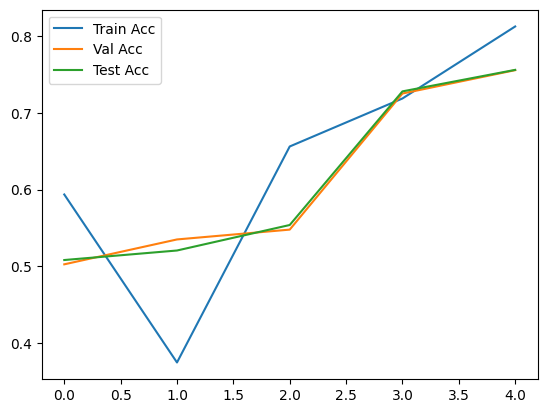

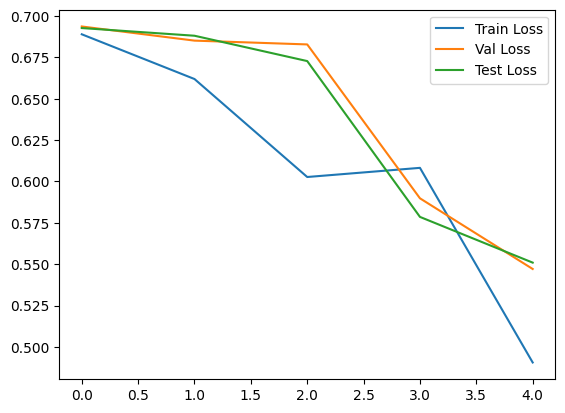

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(history['epochs']), history['train_acc'], label='Train Acc')
plt.plot(range(history['epochs']), history['val_acc'], label='Val Acc')
plt.plot(range(history['epochs']), history['test_acc'], label='Test Acc')
plt.legend()
plt.show()
plt.close()
plt.plot(range(history['epochs']), history['train_loss'], label='Train Loss')
plt.plot(range(history['epochs']), history['val_loss'], label='Val Loss')
plt.plot(range(history['epochs']), history['test_loss'], label='Test Loss')
plt.legend()
plt.show()
plt.close()

### Modelo LSTM con GloVe

In [23]:
vocab_size = max_words_glove
embedding_size = 100
hidden_dim = embedding_size
output_dim = 1 # si fueran datos categóricos (necesario cuando hay más de 2 clases), aquí iría el nº de clases

# model initialization
model = LSTM1(vocab_size, embedding_size, hidden_dim, output_dim, device)
print(model)

LSTM1(
  (embedding): Embedding(400000, 100)
  (lstm): LSTM(100, 100, batch_first=True)
  (fc1): Linear(in_features=100, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [24]:
lr=0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 5 # prueba a aumentar este número
counter = 0
clip = 5 # gradient clipping para prevenir exploding gradient 

if(train_on_gpu):
    model.cuda()

history = {'epochs': epochs, 'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

model.train()

LSTM1(
  (embedding): Embedding(400000, 100)
  (lstm): LSTM(100, 100, batch_first=True)
  (fc1): Linear(in_features=100, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [147]:
# entrenar X epoch
for e in range(epochs):

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # zero accumulated gradients
        model.zero_grad()

        # get the output from the model
        output = model(inputs)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        # train accuracy
        predicted = torch.tensor([1 if i == True else 0 for i in output > 0.5], device=device)
        equals = predicted == labels
        train_acc = torch.mean(equals.type(torch.FloatTensor))


    # loss stats
    # Get validation loss

    val_losses = []
    model.eval()
    num_correct = 0
    for inputs, labels in valid_loader:

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        output = model(inputs)
        val_loss = criterion(output.squeeze(), labels.float())
        val_losses.append(val_loss.item())

        # convert output probabilities to predicted class (0 or 1)
        pred = torch.round(output.squeeze())  # rounds to the nearest integer

        # compare predictions to true label
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)

    val_loss_mean = np.mean(val_losses)
    val_acc = num_correct/len(valid_loader.dataset)

    model.train()
    print(f"Epoch: {e+1}/{epochs}...Step: {counter}...",
          f"train_loss: {loss.item():.4f}...",
          f"train_acc: {train_acc.item():.4f}..."
          f"val_loss: {val_loss_mean:.4f}",
          f"val_acc: {val_acc:.1f}")
    
    history['train_loss'].append(loss.item())
    history['train_acc'].append(train_acc.item())
    history['val_loss'].append(val_loss_mean)
    history['val_acc'].append(val_acc)

Epoch: 1/5...Step: 157... train_loss: 0.6964... train_acc: 0.4062...val_loss: 0.6929 val_acc: 0.5
Epoch: 2/5...Step: 314... train_loss: 0.6959... train_acc: 0.4375...val_loss: 0.6914 val_acc: 0.5
Epoch: 3/5...Step: 471... train_loss: 0.6815... train_acc: 0.6562...val_loss: 0.6833 val_acc: 0.5
Epoch: 4/5...Step: 628... train_loss: 0.6114... train_acc: 0.8125...val_loss: 0.6658 val_acc: 0.7
Epoch: 5/5...Step: 785... train_loss: 0.6285... train_acc: 0.7188...val_loss: 0.5096 val_acc: 0.8


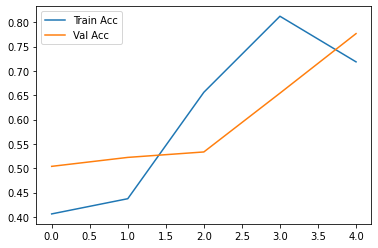

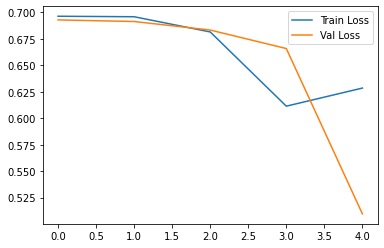

In [148]:
import matplotlib.pyplot as plt
plt.plot(range(history['epochs']), history['train_acc'], label='Train Acc')
plt.plot(range(history['epochs']), history['val_acc'], label='Val Acc')
plt.legend()
plt.show()
plt.close()
plt.plot(range(history['epochs']), history['train_loss'], label='Train Loss')
plt.plot(range(history['epochs']), history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.close()

### Modificamos el modelo
- Añadir otro nivel a la red LSTM (parámetro n_layers).  
- Añadir bidireccionalidad.  
- Añadir capas de dropout.  
- Añadir otro nivel lineal.  

In [30]:
dropout = 0.1
n_layers = 2

class LSTM2(nn.Module):
  def __init__(self, vocabulary_size, embedding_size, hidden_dim,
               output_dim, n_layers, dropout, device):
    super().__init__()

    self.output_size = output_dim
    self.hidden_dim = hidden_dim
    self.device = device

    self.embedding = nn.Embedding(vocabulary_size, embedding_size)
    self.lstm = nn.LSTM(embedding_size,hidden_dim, n_layers, dropout = dropout, batch_first = True,bidirectional=True)
    self.dropout = nn.Dropout(dropout)
    self.fc1 = nn.Linear(hidden_dim*2, hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, output_dim)
    self.sig = nn.Sigmoid()

  def forward(self, x):
    # Aplica la capa de embedding a los datos de entrada
    x = self.embedding(x)
    x = x.float()

    # Aplica la primera capa LSTM a los datos de entrada
    lstm_out1, hidden = self.lstm(x)
    lstm_out1 = lstm_out1[:, -1, :]

    out = self.dropout(lstm_out1)
    out = self.fc1(out)
    out = self.dropout(out)
    out = self.fc2(out)


    o = self.sig(out)
    return o

### Sustitución de pesos GloVe

In [31]:
vocab_size = max_words_glove
embedding_size = 100
hidden_dim = embedding_size
output_dim = 1 # si fueran datos categóricos (necesario cuando hay más de 2 clases), aquí iría el nº de clases

# model initialization
model = LSTM2(vocab_size, embedding_size, hidden_dim, output_dim,n_layers,dropout,device)
print(model)

LSTM2(
  (embedding): Embedding(400000, 100)
  (lstm): LSTM(100, 100, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=200, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [32]:
vocab_size = model.embedding.weight.size(0)
for i in range(vocab_size):
    if word in embeddings_index:
        model.embedding.weight.data[i] = torch.from_numpy(embeddings_index[word])

In [33]:
lr=0.01
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 5 # prueba a aumentar este número
counter = 0
clip = 5 # gradient clipping para prevenir exploding gradient 

if(train_on_gpu):
    model.cuda()

history = {'epochs': epochs, 'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

model.train()

LSTM2(
  (embedding): Embedding(400000, 100)
  (lstm): LSTM(100, 100, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=200, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [34]:
# entrenar X epoch
history = {'epochs': epochs, 'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for e in range(epochs):

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # zero accumulated gradients
        model.zero_grad()

        # get the output from the model
        output = model(inputs)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        # train accuracy
        predicted = torch.tensor([1 if i == True else 0 for i in output > 0.5], device=device)
        equals = predicted == labels
        train_acc = torch.mean(equals.type(torch.FloatTensor))


    # loss stats
    # Get validation loss

    val_losses = []
    model.eval()
    num_correct = 0
    for inputs, labels in valid_loader:

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        output = model(inputs)
        val_loss = criterion(output.squeeze(), labels.float())
        val_losses.append(val_loss.item())

        # convert output probabilities to predicted class (0 or 1)
        pred = torch.round(output.squeeze())  # rounds to the nearest integer

        # compare predictions to true label
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)

    val_loss_mean = np.mean(val_losses)
    val_acc = num_correct/len(valid_loader.dataset)

    model.train()
    print(f"Epoch: {e+1}/{epochs}...Step: {counter}...",
          f"train_loss: {loss.item():.4f}...",
          f"train_acc: {train_acc.item():.4f}..."
          f"val_loss: {val_loss_mean:.4f}",
          f"val_acc: {val_acc:.1f}")
    
    history['train_loss'].append(loss.item())
    history['train_acc'].append(train_acc.item())
    history['val_loss'].append(val_loss_mean)
    history['val_acc'].append(val_acc)

Epoch: 1/5...Step: 157... train_loss: 0.7298... train_acc: 0.3125...val_loss: 0.6959 val_acc: 0.5
Epoch: 2/5...Step: 314... train_loss: 0.6953... train_acc: 0.4688...val_loss: 0.6930 val_acc: 0.5
Epoch: 3/5...Step: 471... train_loss: 0.2113... train_acc: 0.9688...val_loss: 0.4916 val_acc: 0.8
Epoch: 4/5...Step: 628... train_loss: 0.2725... train_acc: 0.9062...val_loss: 0.4349 val_acc: 0.8
Epoch: 5/5...Step: 785... train_loss: 0.1677... train_acc: 0.9688...val_loss: 0.4551 val_acc: 0.9


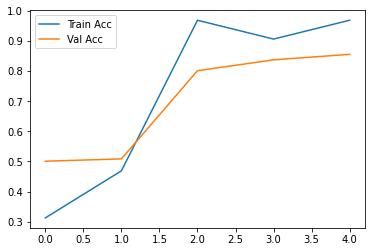

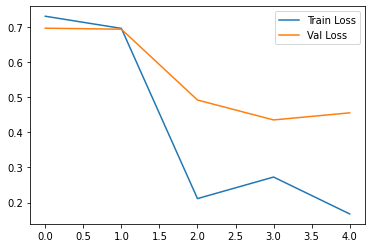

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(history['epochs']), history['train_acc'], label='Train Acc')
plt.plot(range(history['epochs']), history['val_acc'], label='Val Acc')
plt.legend()
plt.show()
plt.close()
plt.plot(range(history['epochs']), history['train_loss'], label='Train Loss')
plt.plot(range(history['epochs']), history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.close()

## Conclusiones
En este informe se evaluó el rendimiento de dos modelos LSTM basados en críticas de IMDB. El primer modelo obtuvo una precisión de 0.8, mientras que el segundo modelo, que incluía una capa de profundidad y otra lineal y utilizaba el vocabulario de GloVe, obtuvo una precisión de 0.5.

Sin embargo, al modificar el tasa de aprendizaje a 0.01 se logró mejorar significativamente el rendimiento del segundo modelo, llegando a una precisión de 0.9. Esto sugiere que el uso del vocabulario de GloVe no es necesariamente beneficioso para el rendimiento del modelo, y que la elección del tasa de aprendizaje es un factor importante a considerar al entrenar un modelo de lenguaje. En este caso la modificación del tasa de aprendizaje permitió que el modelo saliera de un mínimo local y pudiese encontrar una solución mejor a la inicial.

En conclusión, se demostró que es posible mejorar el rendimiento de un modelo LSTM basado en críticas de IMDB a través de la modificación de ciertos parámetros y la adición de capas adicionales. Sin embargo, es importante seguir experimentando con diferentes estructuras y parámetros para encontrar la combinación óptima y lograr un rendimiento óptimo. Aunque el modelo original ya tenía una precisión satisfactoria, se logró mejorar aún más su rendimiento a través de la modificación de los parámetros mencionados.